# Analytics and Programming for Health Wearables, ex 1

Milja Lempinen

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading signal files

In [2]:
data_source_clean = 'data/ecg_ppg_clean.csv'
data_source_motion = 'data/ecg_ppg_motion.csv'

In [3]:
df_clean = pd.read_csv(data_source_clean)
df_motion = pd.read_csv(data_source_motion)

In [4]:
df_clean.head()

,timestamps_ecg,ecg,timestamps_ppg_1_green,ppg_1_green,timestamps_ppg_1_red,ppg_1_red,timestamps_ppg_1_ir,ppg_1_ir,timestamps_ppg_2_green,ppg_2_green,timestamps_ppg_2_red,ppg_2_red,timestamps_ppg_2_ir,ppg_2_ir
0,725290.0,-1949.000000,725314.0,31289.000000,725314.0,2.274565e+06,725314.0,2.544369e+06,725301.0,28101.000000,725301.0,2.534342e+06,725301.0,2.540145e+06
1,725368.0,-1737.708861,725414.0,31255.336634,725414.0,2.274575e+06,725414.0,2.544328e+06,725401.0,28117.666667,725401.0,2.534269e+06,725401.0,2.539954e+06
2,725446.0,-1534.215190,725514.0,31204.029703,725514.0,2.274564e+06,725514.0,2.544304e+06,725501.0,28114.156863,725501.0,2.534142e+06,725501.0,2.539586e+06
3,725524.0,-1413.556962,725614.0,31186.504950,725614.0,2.274553e+06,725614.0,2.544289e+06,725601.0,28101.764706,725601.0,2.533956e+06,725601.0,2.539082e+06
4,725602.0,-1333.050633,725714.0,31166.029412,725714.0,2.274524e+06,725714.0,2.544271e+06,725701.0,28083.490196,725701.0,2.533720e+06,725701.0,2.538444e+06


In [5]:
df_motion.head()

,timestamps_ecg,ecg,timestamps_ppg_1_green,ppg_1_green,timestamps_ppg_1_red,ppg_1_red,timestamps_ppg_1_ir,ppg_1_ir,timestamps_ppg_2_green,ppg_2_green,timestamps_ppg_2_red,ppg_2_red,timestamps_ppg_2_ir,ppg_2_ir
0,763530.0,-1395.000000,763536.0,30428.000000,763536.0,2.275115e+06,763536.0,2.546066e+06,763512.0,21303.000000,763512.0,2.273412e+06,763512.0,2.267852e+06
1,763608.0,-1353.531646,763636.0,30448.792079,763636.0,2.275110e+06,763636.0,2.546067e+06,763612.0,21315.745098,763612.0,2.273418e+06,763612.0,2.267880e+06
2,763686.0,-1101.531646,763736.0,30440.178218,763736.0,2.275118e+06,763736.0,2.546061e+06,763712.0,21326.673267,763712.0,2.273422e+06,763712.0,2.267867e+06
3,763764.0,-878.544304,763836.0,30463.058824,763836.0,2.275130e+06,763836.0,2.546074e+06,763812.0,21333.656863,763812.0,2.273415e+06,763812.0,2.267844e+06
4,763842.0,-820.632911,763936.0,30473.504950,763936.0,2.275127e+06,763936.0,2.546079e+06,763912.0,21345.176471,763912.0,2.273398e+06,763912.0,2.267842e+06


In [6]:
df_clean.tail()

,timestamps_ecg,ecg,timestamps_ppg_1_green,ppg_1_green,timestamps_ppg_1_red,ppg_1_red,timestamps_ppg_1_ir,ppg_1_ir,timestamps_ppg_2_green,ppg_2_green,timestamps_ppg_2_red,ppg_2_red,timestamps_ppg_2_ir,ppg_2_ir
15696,1949578.0,-795.746835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15697,1949656.0,-713.493671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15698,1949734.0,-620.556962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15699,1949812.0,-590.886076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15700,1949890.0,-599.392405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_motion.tail()

,timestamps_ecg,ecg,timestamps_ppg_1_green,ppg_1_green,timestamps_ppg_1_red,ppg_1_red,timestamps_ppg_1_ir,ppg_1_ir,timestamps_ppg_2_green,ppg_2_green,timestamps_ppg_2_red,ppg_2_red,timestamps_ppg_2_ir,ppg_2_ir
16007,2012076.0,40.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16008,2012154.0,-911.645570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16009,2012232.0,-3209.037975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16010,2012310.0,-4635.620253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16011,2012388.0,-2907.974684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Inspecting the signal plots

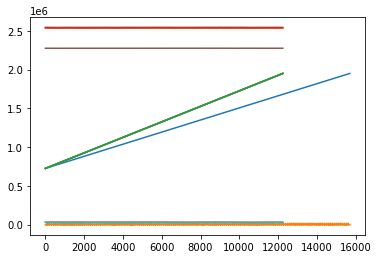

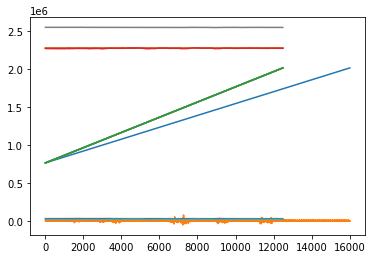

In [8]:
plt.plot(df_clean)
plt.show()

plt.plot(df_motion)
plt.show()

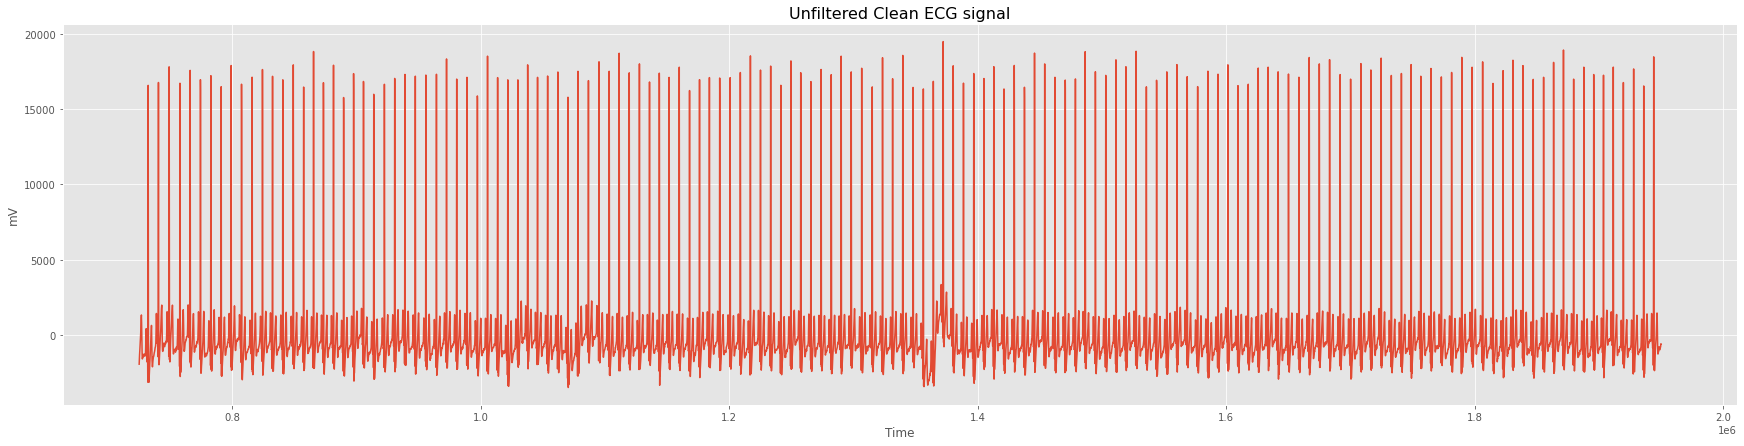

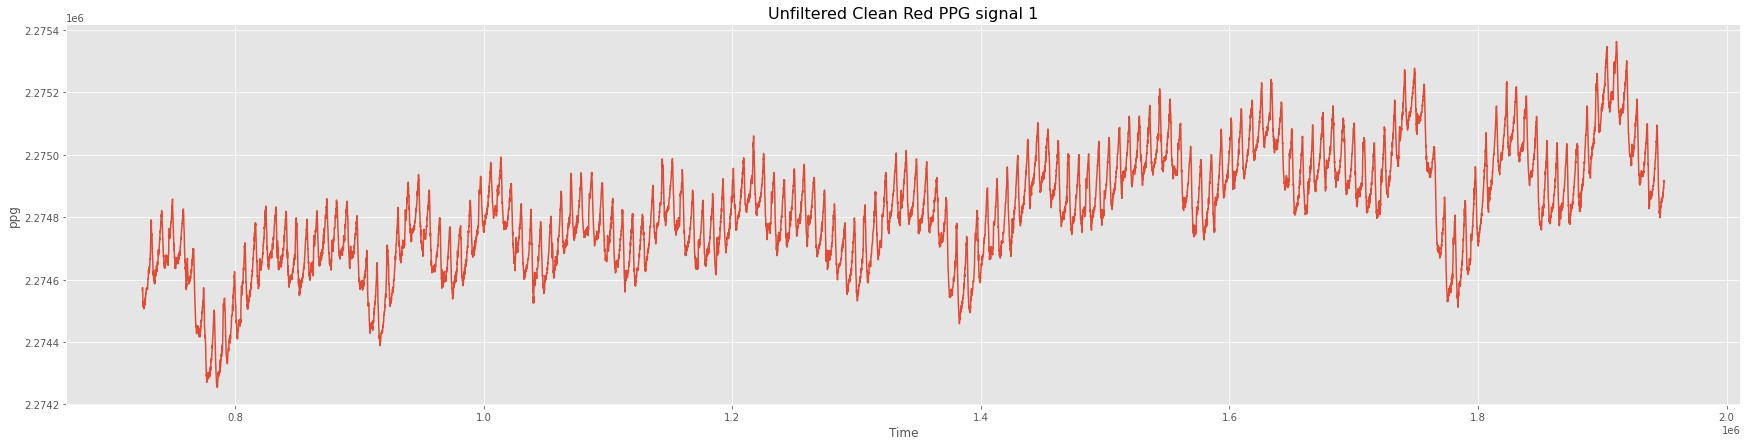

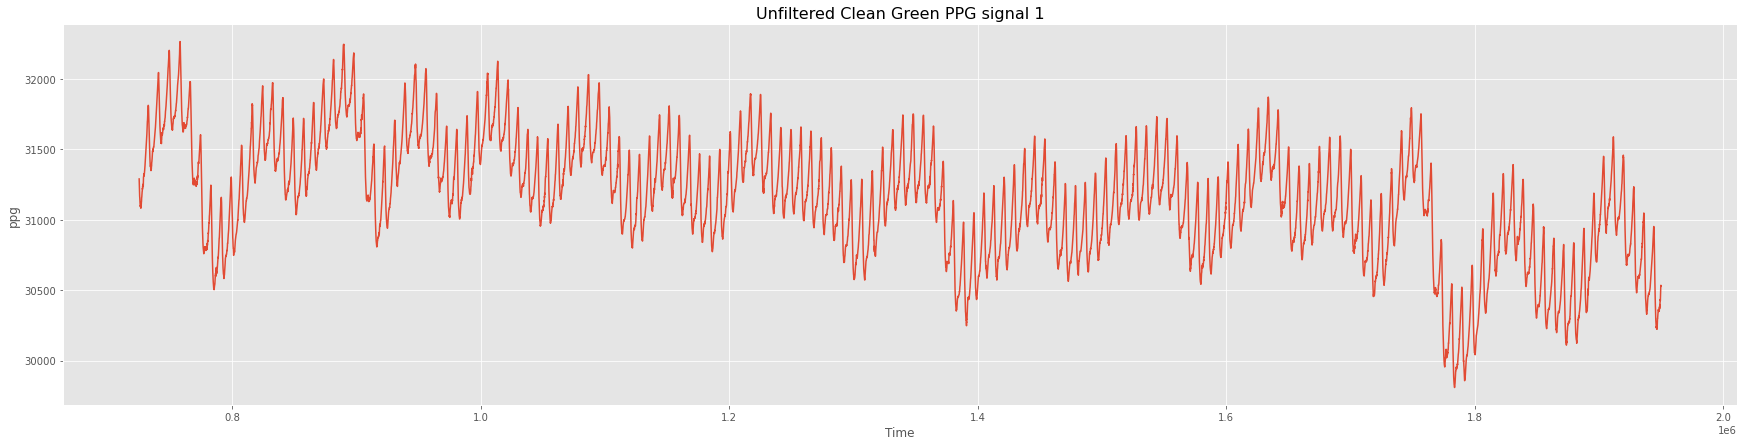

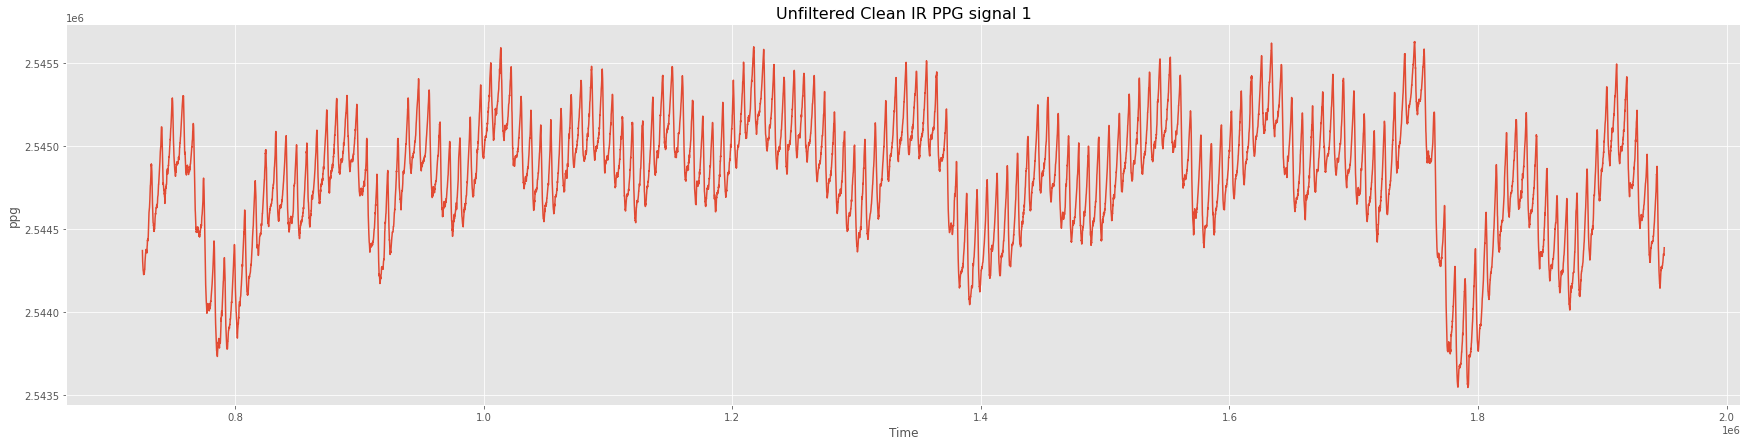

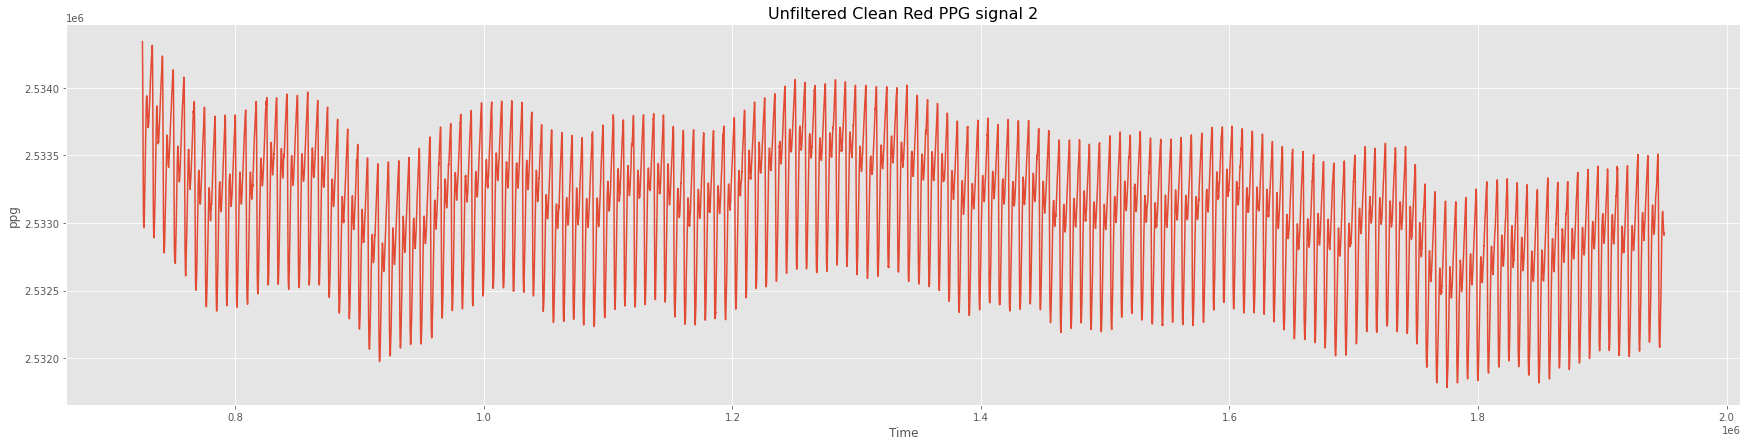

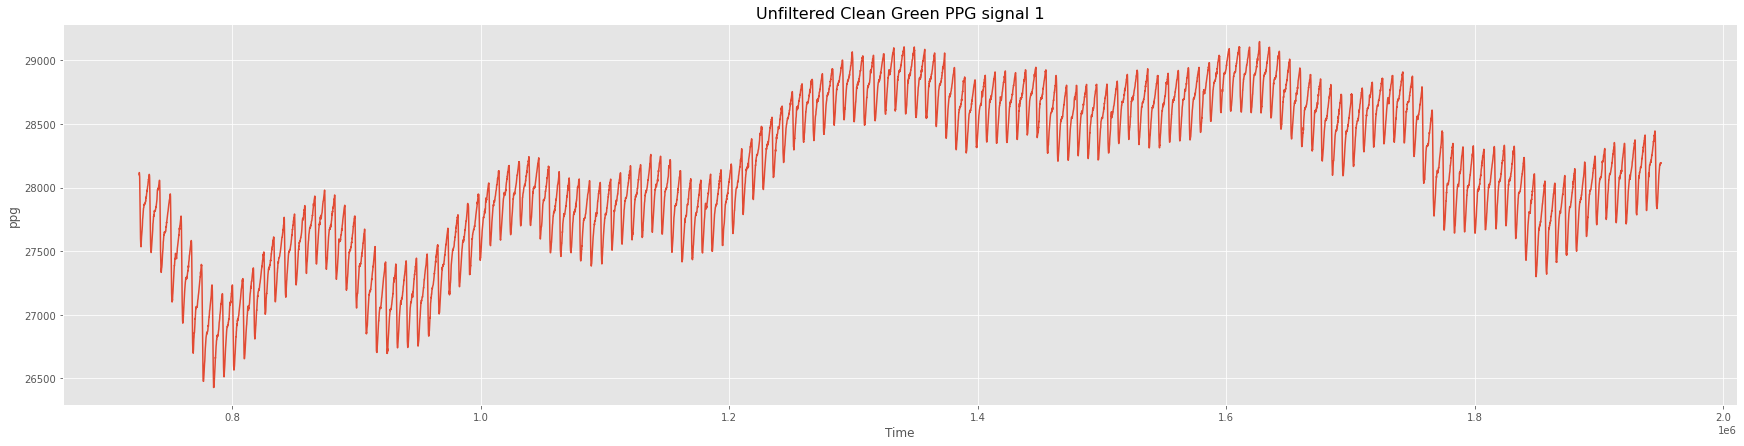

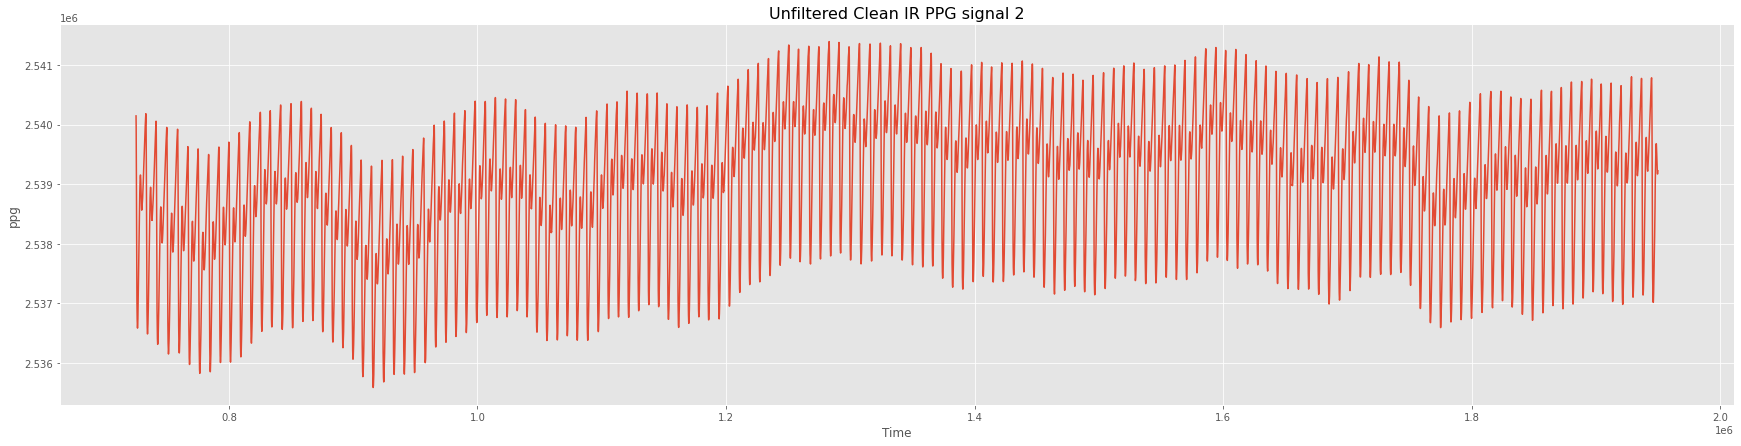

In [9]:
plt.figure(figsize=(30,7))
plt.style.use('ggplot')
plt.title("Unfiltered Clean ECG signal", fontsize=16)
plt.xlabel("Time")
plt.ylabel("mV")
plt.plot(df_clean['timestamps_ecg'], df_clean['ecg'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Clean Red PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_clean['timestamps_ppg_1_red'], df_clean['ppg_1_red'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Clean Green PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_clean['timestamps_ppg_1_green'], df_clean['ppg_1_green'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Clean IR PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_clean['timestamps_ppg_1_ir'], df_clean['ppg_1_ir'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Clean Red PPG signal 2", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_clean['timestamps_ppg_2_red'], df_clean['ppg_2_red'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Clean Green PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_clean['timestamps_ppg_2_green'], df_clean['ppg_2_green'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Clean IR PPG signal 2", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_clean['timestamps_ppg_2_ir'], df_clean['ppg_2_ir'])
plt.show()

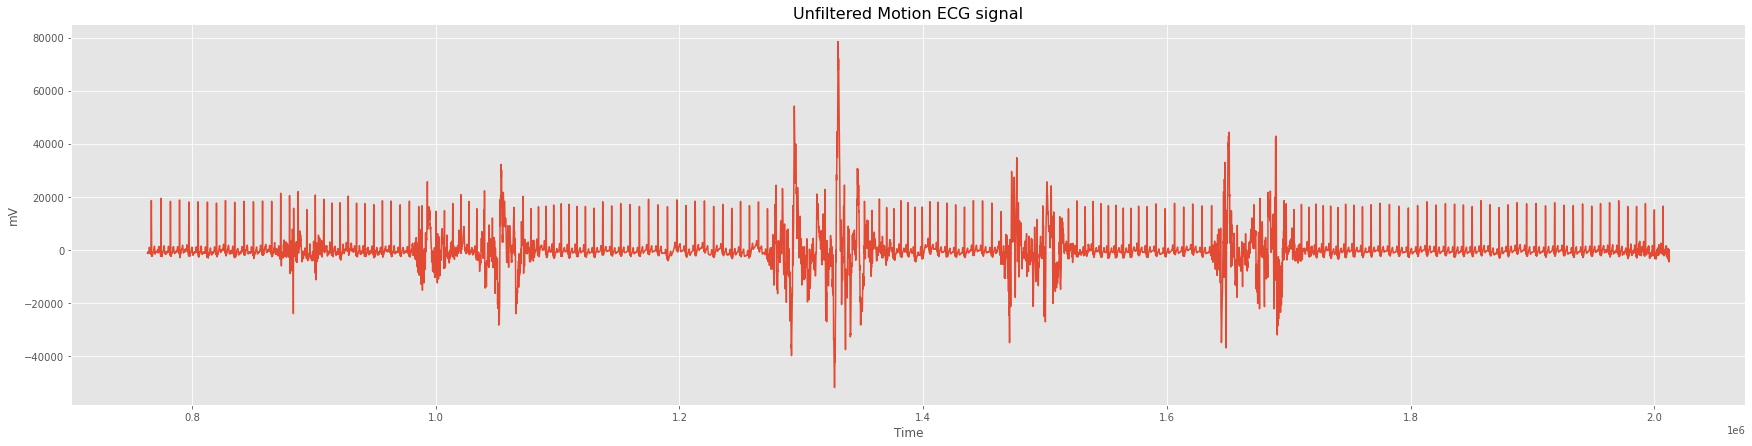

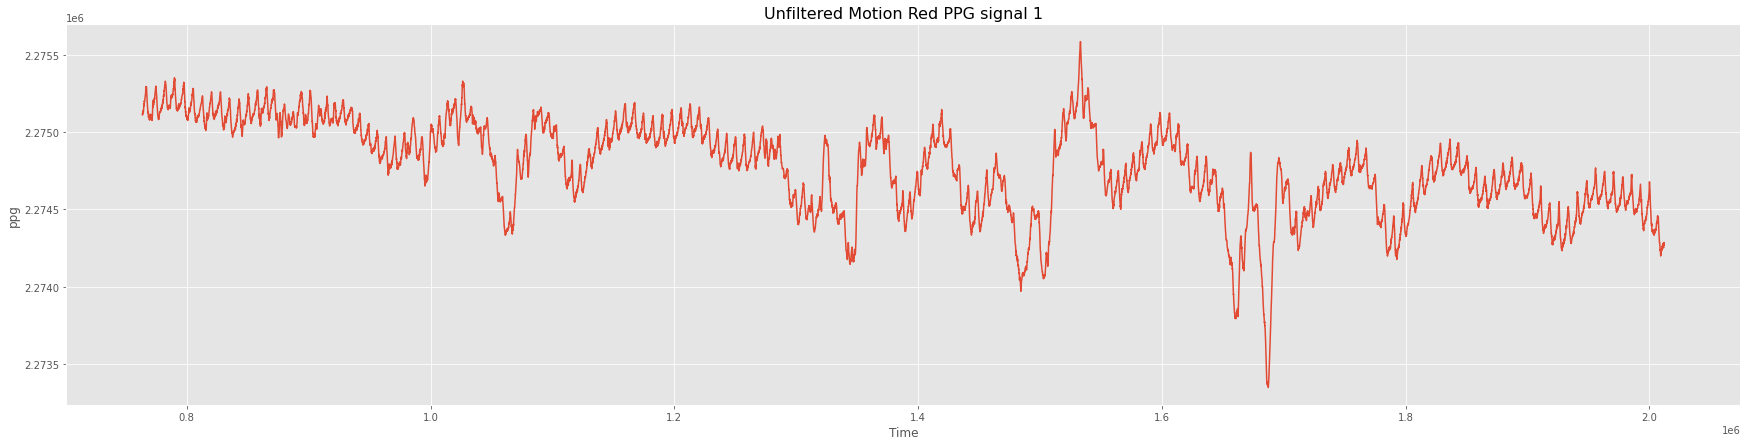

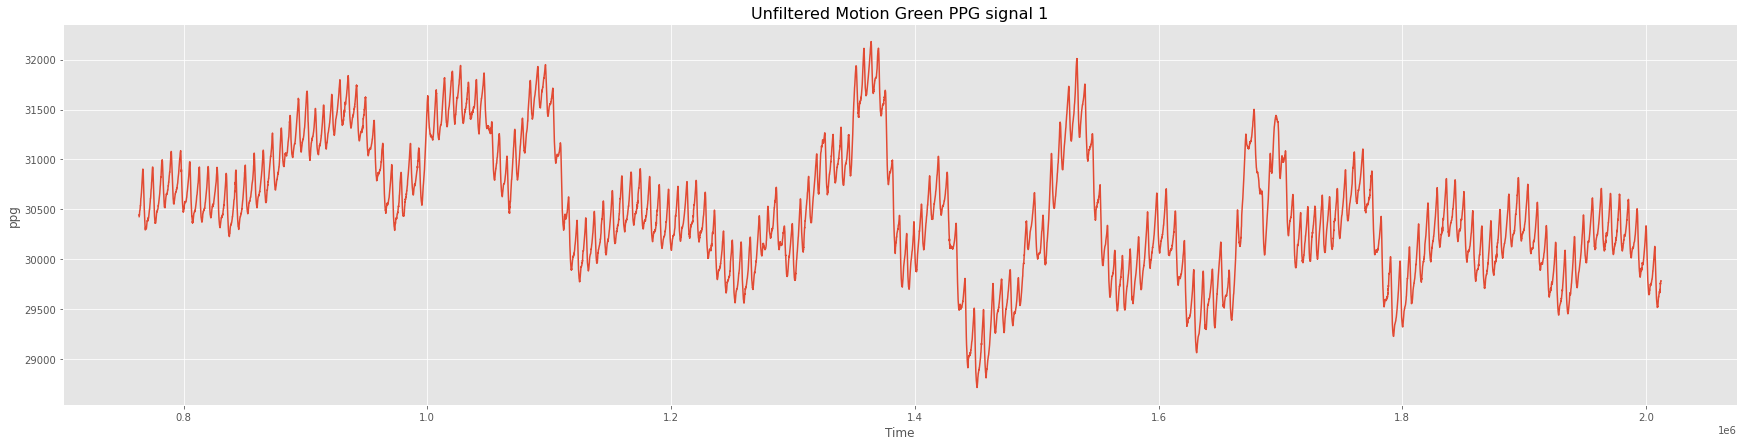

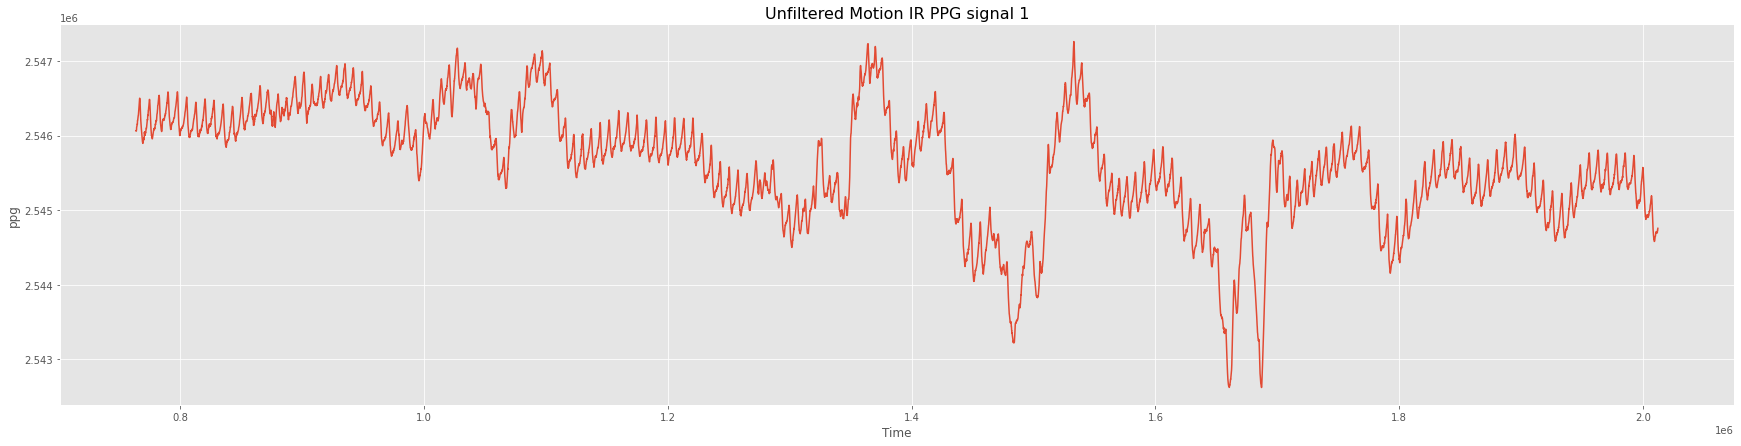

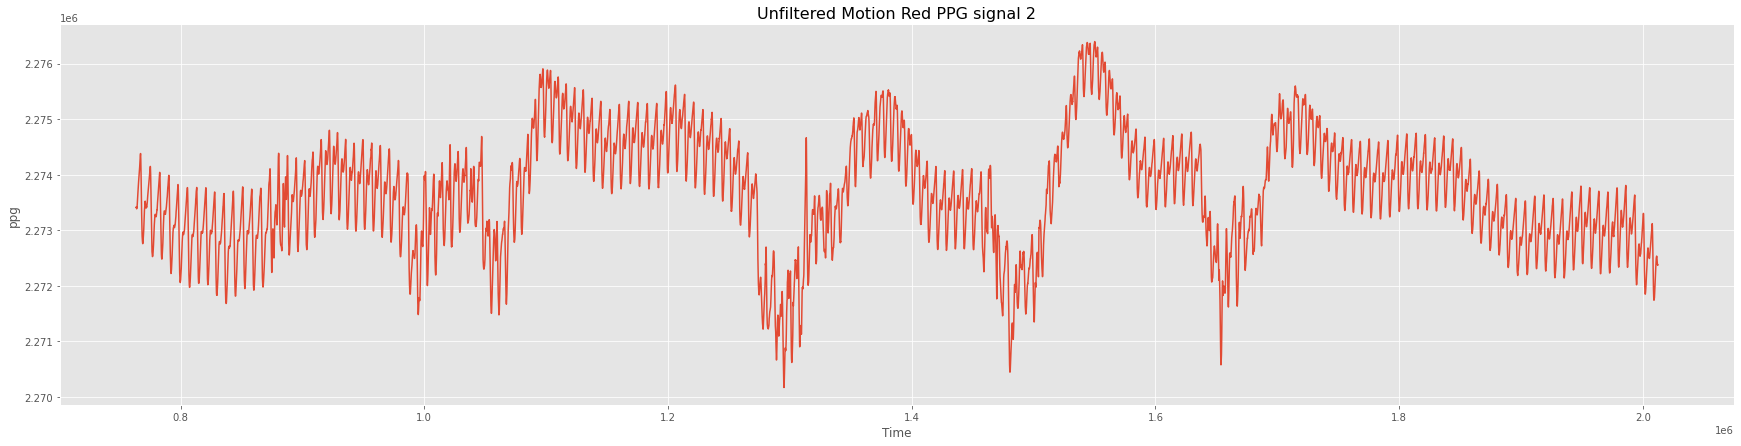

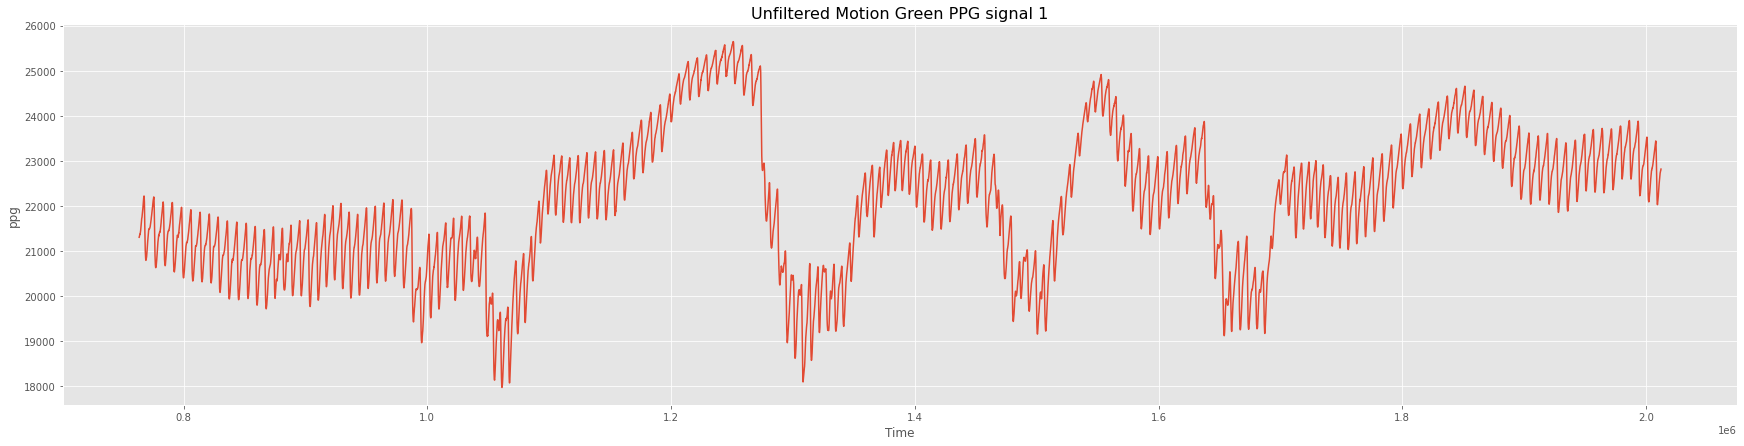

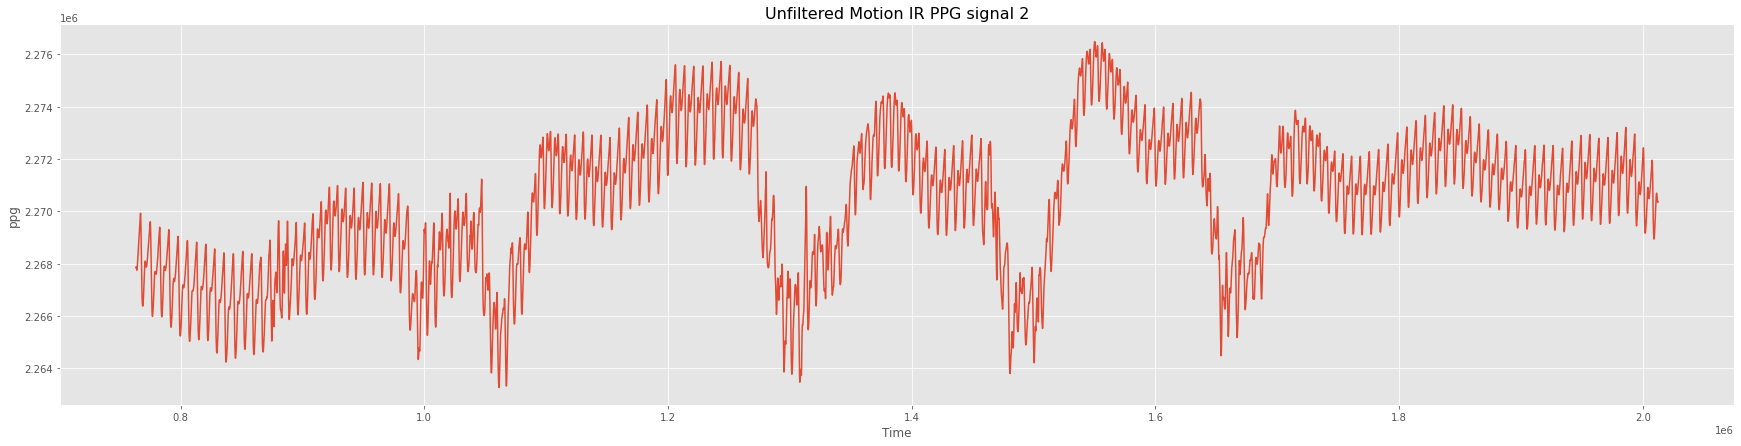

In [10]:
plt.figure(figsize=(30,7))
plt.title("Unfiltered Motion ECG signal", fontsize=16)
plt.xlabel("Time")
plt.ylabel("mV")
plt.plot(df_motion['timestamps_ecg'], df_motion['ecg'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Motion Red PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_motion['timestamps_ppg_1_red'], df_motion['ppg_1_red'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Motion Green PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_motion['timestamps_ppg_1_green'], df_motion['ppg_1_green'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Motion IR PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_motion['timestamps_ppg_1_ir'], df_motion['ppg_1_ir'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Motion Red PPG signal 2", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_motion['timestamps_ppg_2_red'], df_motion['ppg_2_red'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Motion Green PPG signal 1", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_motion['timestamps_ppg_2_green'], df_motion['ppg_2_green'])
plt.show()

plt.figure(figsize=(30,7))
plt.title("Unfiltered Motion IR PPG signal 2", fontsize=16)
plt.xlabel("Time")
plt.ylabel("ppg")
plt.plot(df_motion['timestamps_ppg_2_ir'], df_motion['ppg_2_ir'])
plt.show()

<font color = green /> The signals have some clear noise, which needs to be filtered out. 

## 1. Splitting signals into their own dataframes

In [11]:
#Separating the signals into their own dataframes

def signalsplitter(time, sig):
    new_time = time.dropna()
    new_sig = sig.dropna()
    signalarray = pd.concat([new_time, new_sig], axis=1)
    
    return signalarray

ecg_motion = signalsplitter(df_motion['timestamps_ecg'], df_motion['ecg'])
ppg_motion_red_1 = signalsplitter(df_motion['timestamps_ppg_1_red'], df_motion['ppg_1_red'])
ppg_motion_green_1 = signalsplitter(df_motion['timestamps_ppg_1_green'], df_motion['ppg_1_green'])
ppg_motion_ir_1 = signalsplitter(df_motion['timestamps_ppg_1_ir'], df_motion['ppg_1_ir'])
ppg_motion_red_2 = signalsplitter(df_motion['timestamps_ppg_2_red'], df_motion['ppg_2_red'])
ppg_motion_green_2 = signalsplitter(df_motion['timestamps_ppg_2_green'], df_motion['ppg_2_green'])
ppg_motion_ir_2 = signalsplitter(df_motion['timestamps_ppg_2_ir'], df_motion['ppg_2_ir'])

ecg_clean = signalsplitter(df_clean['timestamps_ecg'], df_clean['ecg'])
ppg_clean_red_1 = signalsplitter(df_clean['timestamps_ppg_1_red'], df_clean['ppg_1_red'])
ppg_clean_green_1 = signalsplitter(df_clean['timestamps_ppg_1_green'], df_clean['ppg_1_green'])
ppg_clean_ir_1 = signalsplitter(df_clean['timestamps_ppg_1_ir'], df_clean['ppg_1_ir'])
ppg_clean_red_2 = signalsplitter(df_clean['timestamps_ppg_2_red'], df_clean['ppg_2_red'])
ppg_clean_green_2 = signalsplitter(df_clean['timestamps_ppg_2_green'], df_clean['ppg_2_green'])
ppg_clean_ir_2 = signalsplitter(df_clean['timestamps_ppg_2_ir'], df_clean['ppg_2_ir'])

print(len(ecg_motion))
print(len(ppg_motion_red_1))
print(len(ppg_motion_green_1))

print(len(ecg_clean))
print(len(ppg_clean_red_1))

print(ecg_clean.head())

16012
12488
12488
15701
12246
   timestamps_ecg          ecg
0        725290.0 -1949.000000
1        725368.0 -1737.708861
2        725446.0 -1534.215190
3        725524.0 -1413.556962
4        725602.0 -1333.050633


# 2. Signal resampling

In [12]:
#The actual sampling frequencies

def actual_sampling_fr(data):
    frequency = len(data)/(data.iat[len(data)-1,0]-data.iat[0,0])*10000
    return frequency

print("ECG: " + str(actual_sampling_fr(ecg_clean)))

ECG: 128.213294136861


In [13]:
from scipy import signal
#Resampling

def resampling_transformer(data):
    cofactor = 200 / actual_sampling_fr(data)
    n = int(cofactor*len(data))
    result = signal.resample(data.iloc[:,0], n, data.iloc[:,1])
    
    return result

ecg_resampled_clean = resampling_transformer(ecg_clean)
ecg_resampled_motion = resampling_transformer(ecg_motion)

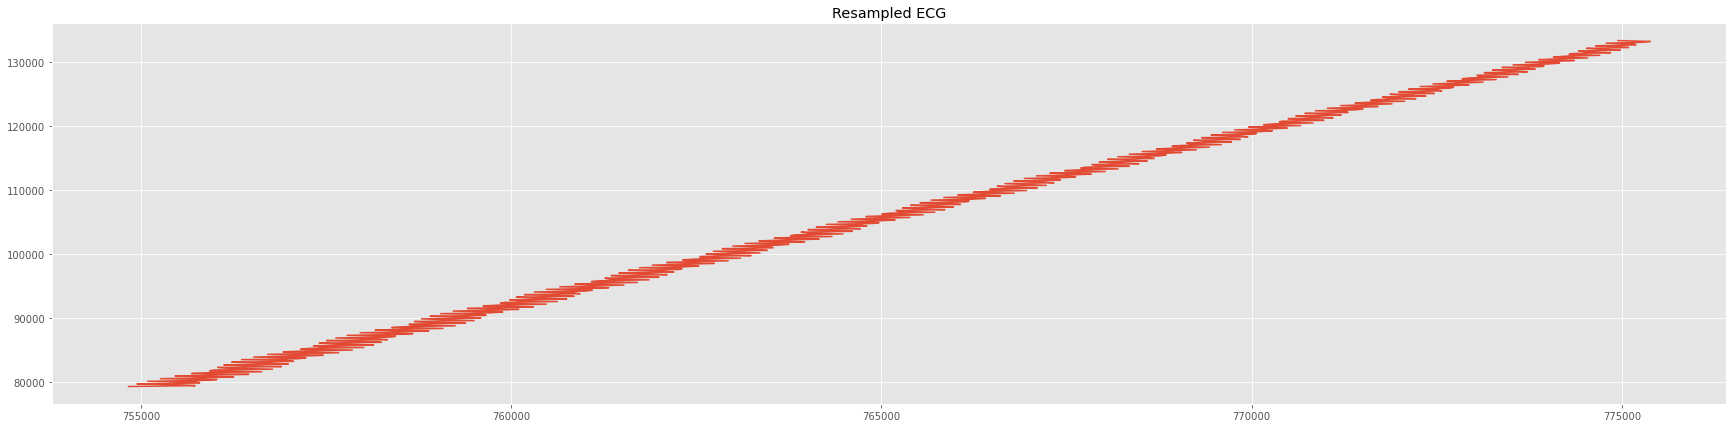

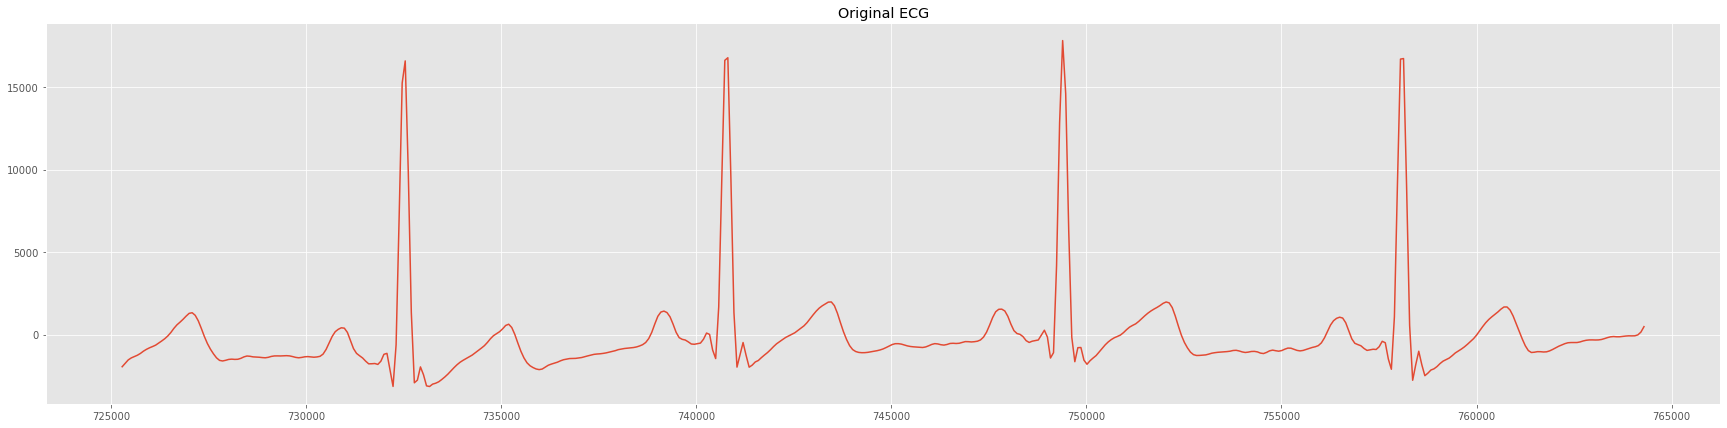

In [14]:
plt.figure(figsize=(30,7))
plt.title("Resampled ECG")
plt.plot(ecg_resampled_clean[0][600:1000], ecg_resampled_clean[1][600:1000])
plt.show()

#Probably not what this should look like... a complete and total mess

plt.figure(figsize=(30,7))
plt.title("Original ECG")
plt.plot(ecg_clean['timestamps_ecg'].loc[0:500], ecg_clean['ecg'].loc[0:500])
plt.show()

In [19]:
#Retrying the resample-thing with function introduced on the lecture
from scipy import interpolate

#scaling time to be compatible with the spliner's demands
ecg_time = (ecg_clean['timestamps_ecg'].to_numpy(dtype='float') - ecg_clean['timestamps_ecg'][0]) / 10000

def spliner(time, data, new_time):
    spline_fn = interpolate.interp1d(time, data, kind='cubic', fill_value = 'extrapolate')
    return spline_fn(new_time)

cofactor = 200 / actual_sampling_fr(ecg_clean)
fr = 200
dt =1/fr
n = int(cofactor*len(ecg_clean))
new_timestamps_ecg_c = np.arange(n)*dt

ecg_splined = spliner(ecg_time, ecg_clean['ecg'], new_timestamps_ecg_c)

print(ecg_splined)

[-1949.         -1818.21328913 -1674.91329338 ...  -615.71146356
  -593.09321954  -592.31294126]


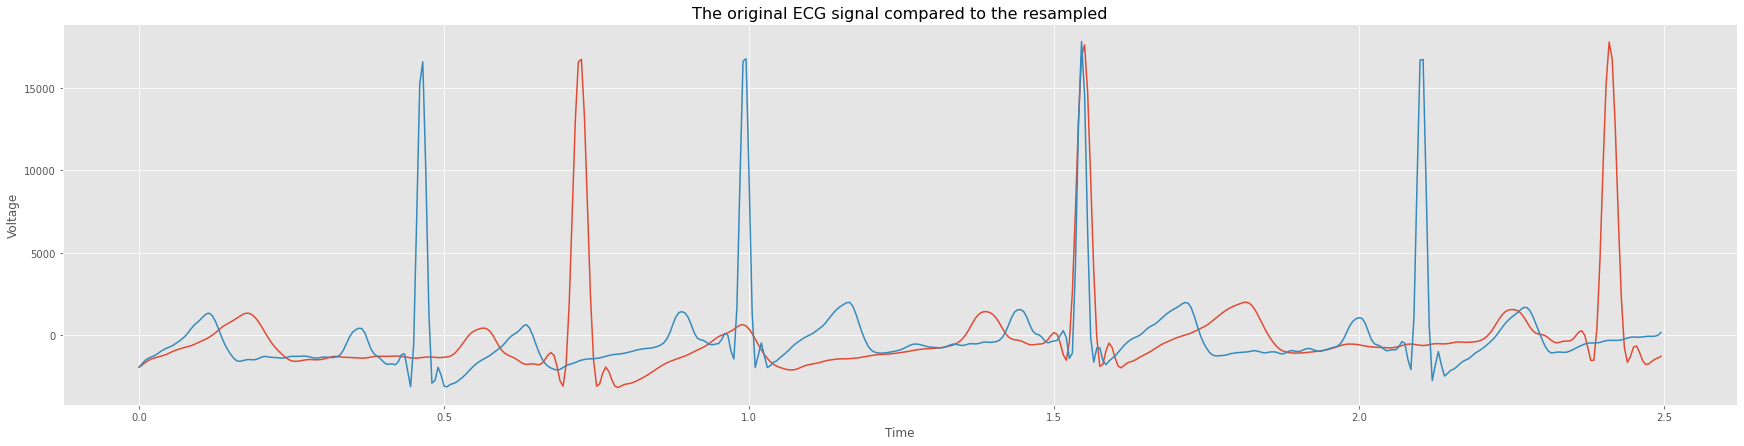

In [20]:
plt.figure(figsize=(30,7))
plt.title('The original ECG signal compared to the resampled', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.plot(new_timestamps_ecg_c[0:500], ecg_splined[0:500])
plt.plot(new_timestamps_ecg_c[0:500], ecg_clean['ecg'].loc[0:499])

In [21]:
#Resampling some PPG signals as well

ppg_time_m_r1 = (ppg_clean_red_1['timestamps_ppg_1_red'].to_numpy(dtype='float') - ppg_clean_red_1['timestamps_ppg_1_red'][0]) / 10000

cofactor = 200 / actual_sampling_fr(ppg_clean_red_1)
fr = 200
dt =1/fr
n = int(cofactor*len(ppg_motion_red_1))
new_timestamps_ppg_m_r1 = np.arange(n)*dt

ppg_m_r1_splined = spliner(ppg_time_m_r1, ppg_clean_red_1['ppg_1_red'], new_timestamps_ppg_m_r1)


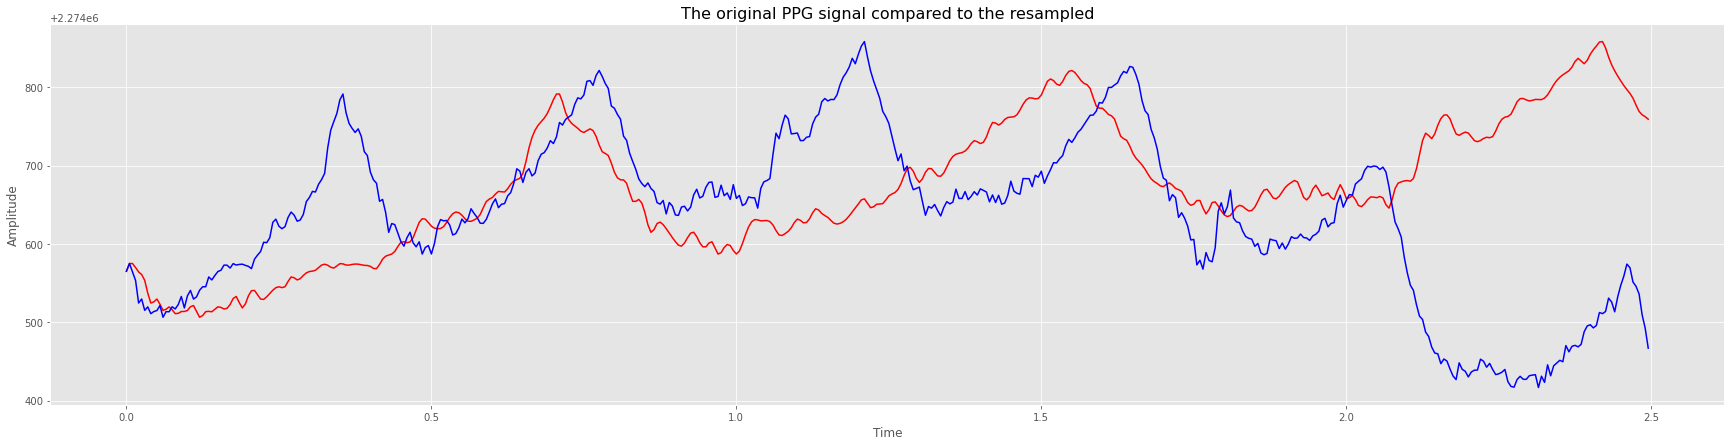

In [23]:
plt.figure(figsize=(30,7))
plt.title('The original PPG signal compared to the resampled', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(new_timestamps_ppg_m_r1[0:500], ppg_m_r1_splined[0:500], color='red')
plt.plot(new_timestamps_ppg_m_r1[0:500], ppg_clean_red_1['ppg_1_red'].loc[0:499], color='blue')

<font color=green> The ECG signal looks much clearer and already has all ecg elements visible. From here filtering needs to be done. It does not drastically differ from the original signal, mut some scaling has happened. The PPG, on the other hand, shows more stability now than before.

# 3. Inspecting the frequency domain

In [24]:
# Drawing ecg frequency domain

ecg_freq = signal.welch(ecg_splined, fs=200)

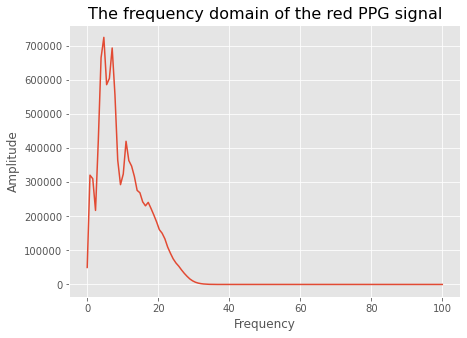

In [25]:
plt.figure(figsize=(7,5))
plt.title('The frequency domain of the red PPG signal', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(ecg_freq[0], ecg_freq[1])
plt.show()

<font color=green> Trying again with normalized ecg signal

In [26]:
ecg_normalized = signal.normalize(ecg_clean['ecg'], ecg_clean['timestamps_ecg'])

ecg_n_splined = spliner(ecg_time, ecg_normalized[0], new_timestamps_ecg_c)

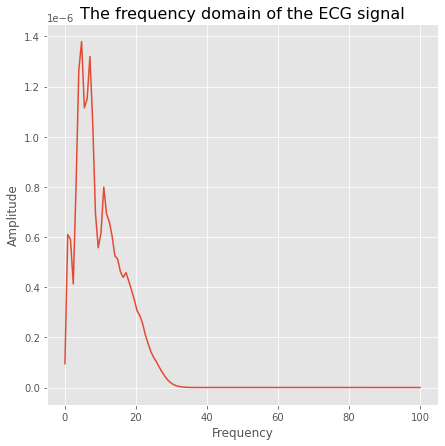

In [27]:
ecg_n_freq = signal.welch(ecg_n_splined, fs=200)

plt.figure(figsize=(7,7))
plt.title('The frequency domain of the ECG signal', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(ecg_n_freq[0], ecg_n_freq[1])
plt.show()

<font color=green> Only the y-axis values differ, which does not affect the x.

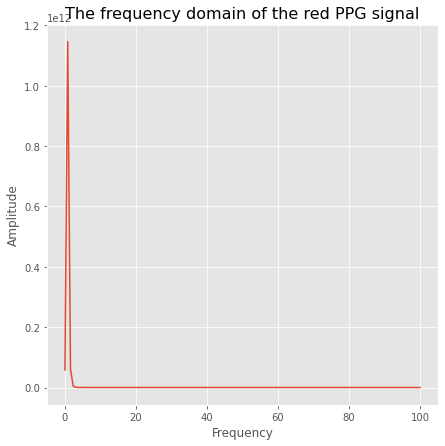

In [28]:
#Inspecting the red motion ppg-signal

ppg_freq = signal.welch(ppg_m_r1_splined, fs=200)

plt.figure(figsize=(7,7))
plt.title('The frequency domain of the red PPG signal', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(ppg_freq[0], ppg_freq[1])
plt.show()

<font color=green> In both signals the frequencies seem to be alright in regards of the normal heart rate frequencies.

# 4. Filtering

[ -48.75216517   76.92087433  199.61853594 ... -297.61568736 -273.35416335
 -268.36827525]


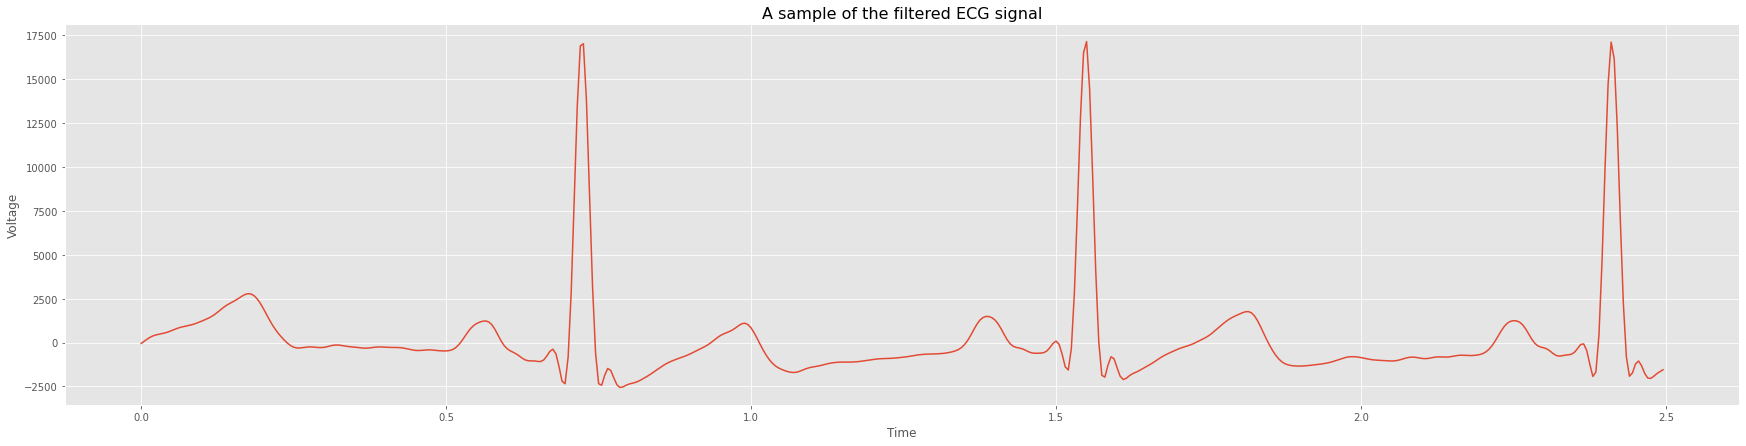

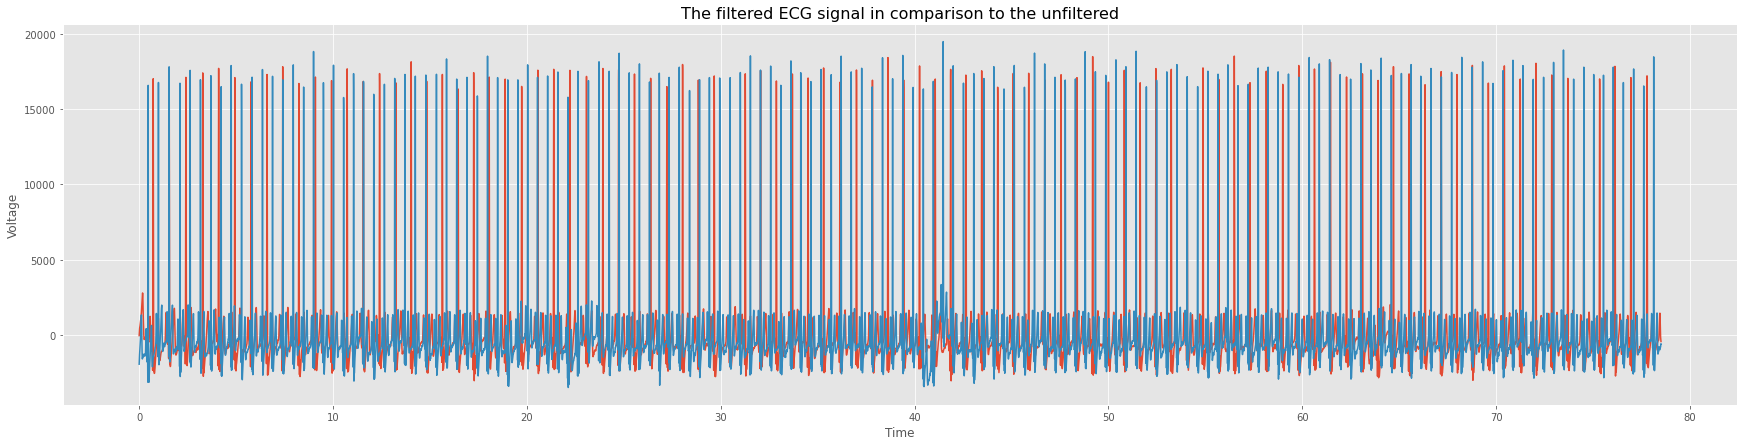

In [29]:
#Designing a butterworth bandpass filter in 2nd order

nyq = 200/2
low = 0.5/nyq
high = 40/nyq

b, a = signal.butter(2, [low, high], btype='bandpass')

ecg_clean_filtered = signal.filtfilt(b, a, ecg_splined)

print(ecg_clean_filtered)

ecg_filt_freq = signal.welch(ecg_clean_filtered, fs=200)

plt.figure(figsize=(30,7))
plt.title('A sample of the filtered ECG signal', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.plot(new_timestamps_ecg_c[0:500], ecg_clean_filtered[0:500])
plt.show()

plt.figure(figsize=(30, 7))
plt.title('The filtered ECG signal in comparison to the unfiltered', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.plot(new_timestamps_ecg_c[0:len(ecg_clean)], ecg_clean_filtered[0:len(ecg_clean)])
plt.plot(new_timestamps_ecg_c[0:len(ecg_clean)], ecg_clean['ecg'])

<font color=green> The filtering cleaned some of the noise, but the effects are not too drastical since the original signal was also quite clean.

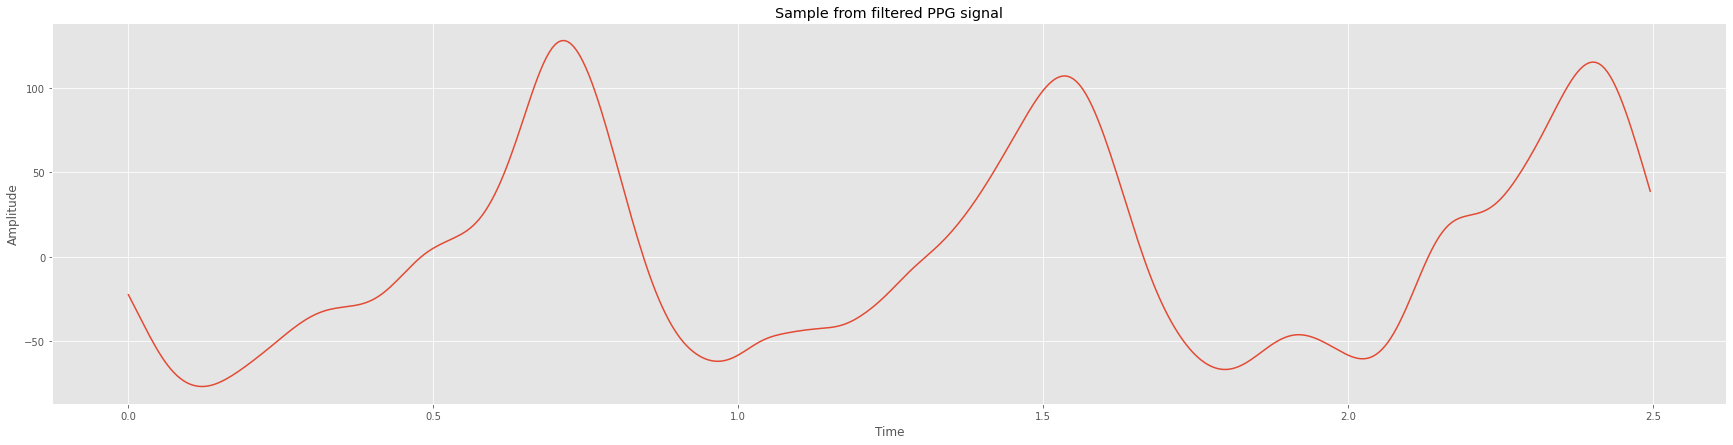

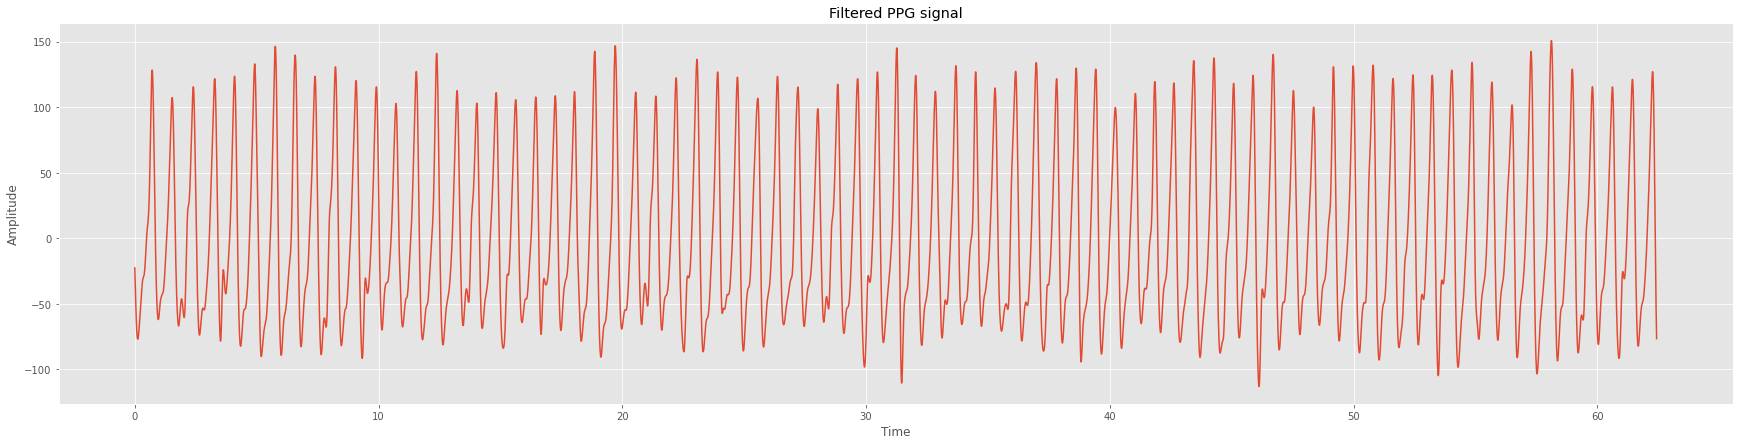

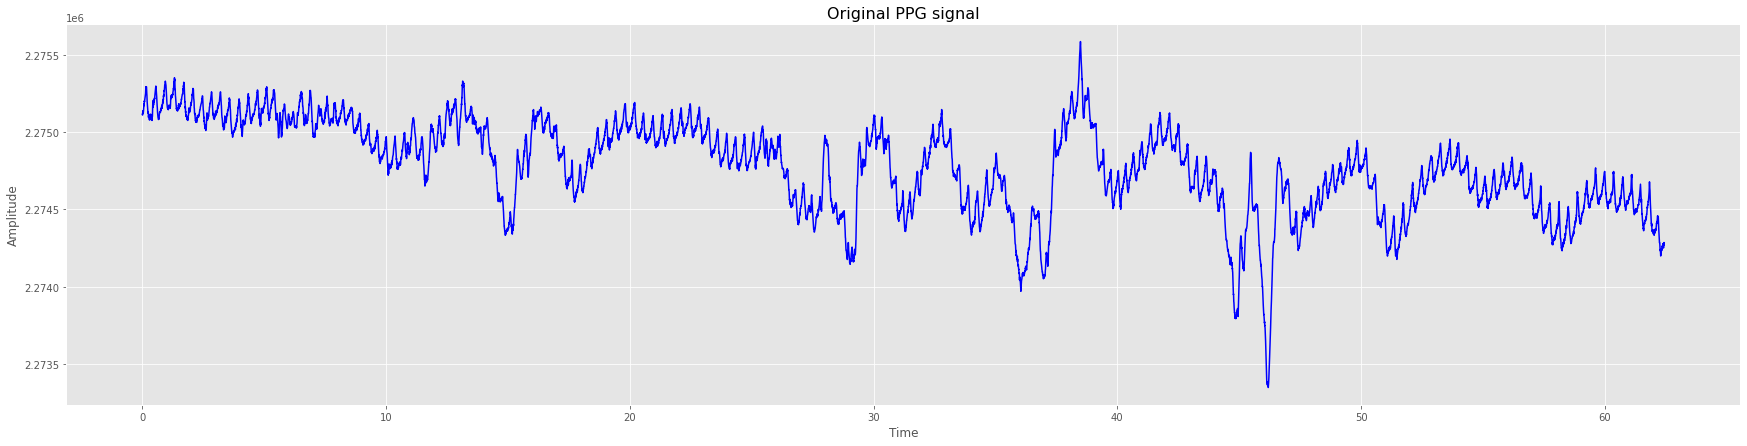

In [30]:
#Testing the filter out with some of the PPG signals, adjusting the highcut and lowcut frequencies.

nyq = 200/2
low_ppg = 0.5/nyq
high_ppg = 5/nyq

d, c = signal.butter(2, [low_ppg, high_ppg], btype='bandpass')

ppg_m_r1_filtered = signal.filtfilt(d, c, ppg_m_r1_splined)

plt.figure(figsize=(30,7))
plt.title('Sample from filtered PPG signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(new_timestamps_ppg_m_r1[0:500], ppg_m_r1_filtered[0:500])
plt.show()

plt.figure(figsize=(30, 7))
plt.title('Filtered PPG signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(new_timestamps_ppg_m_r1[0:len(ppg_motion_red_1)], ppg_m_r1_filtered[0:len(ppg_motion_red_1)])
plt.show()

plt.figure(figsize=(30,7))
plt.title('Original PPG signal', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(new_timestamps_ppg_m_r1[0:len(ppg_motion_red_1)], ppg_motion_red_1['ppg_1_red'], color='blue')
plt.show()

<font color=green> The PPG signal comes out very smooth. The baseline wander is almost gone. There is still some disturbance visible, which can be caused by contact errors or similar issues. 

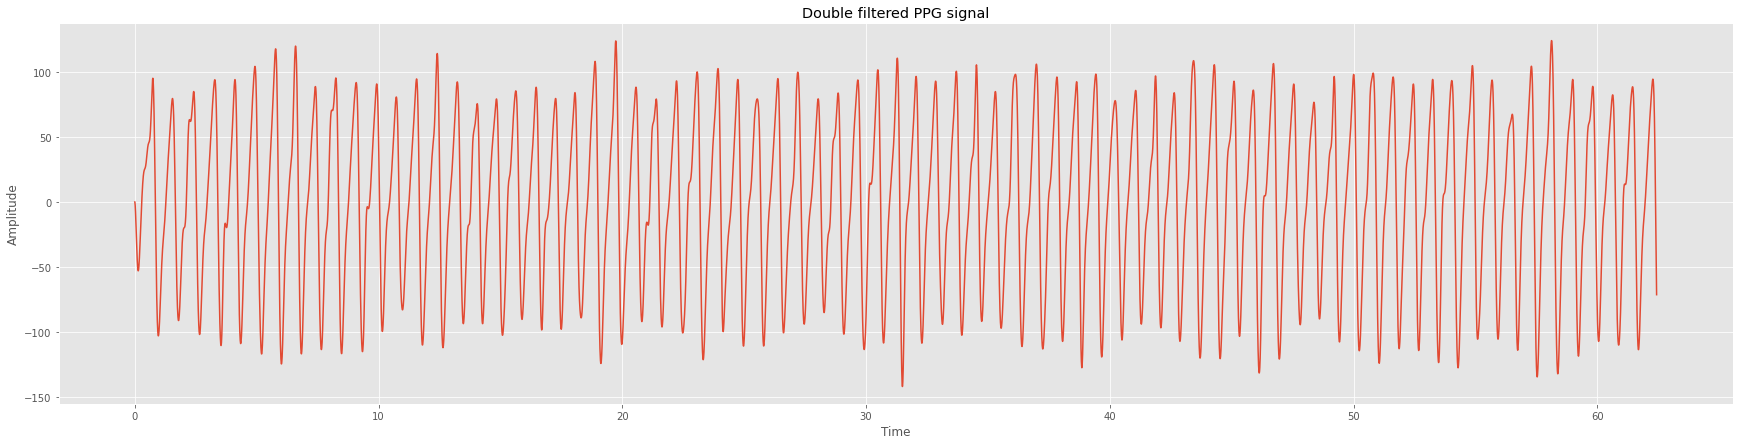

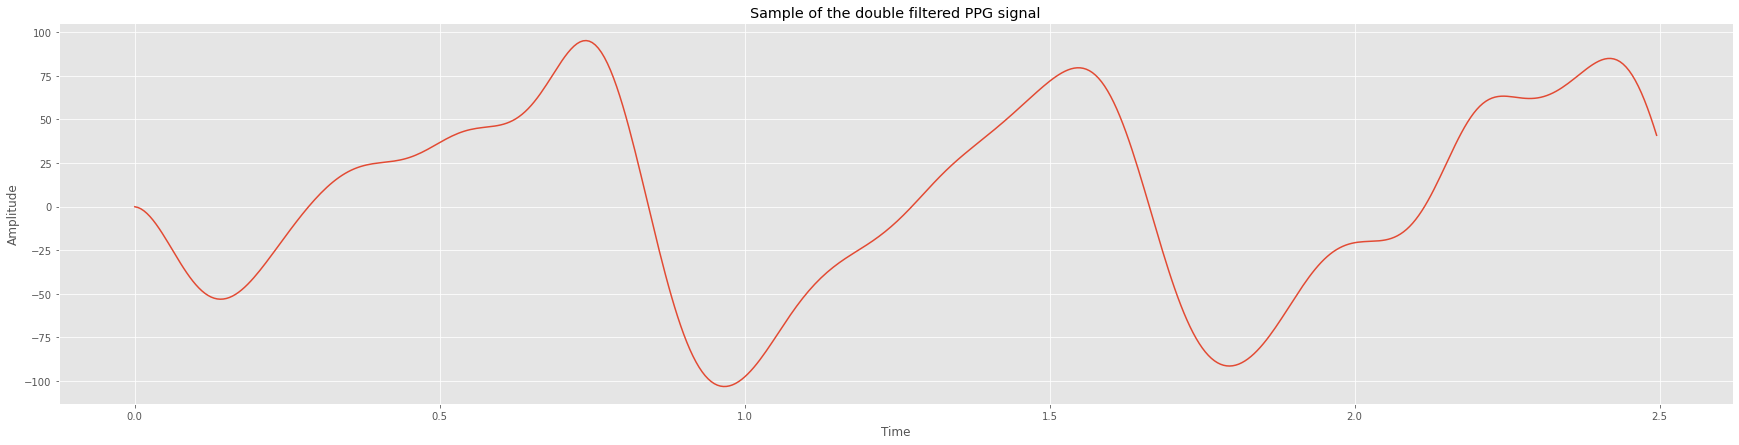

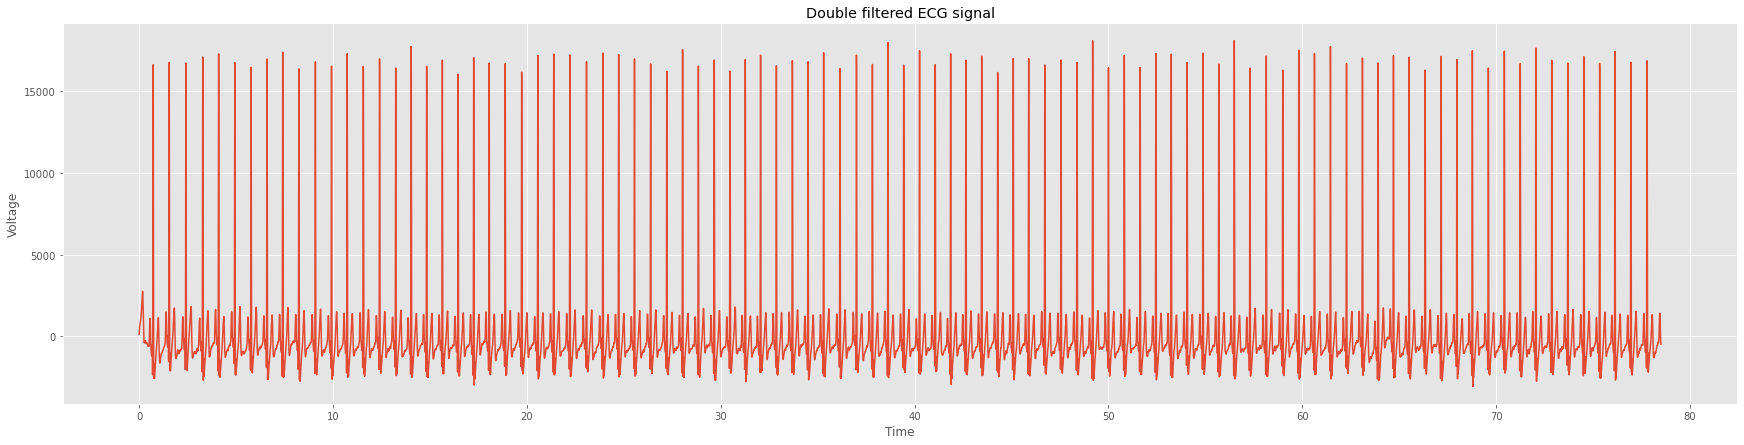

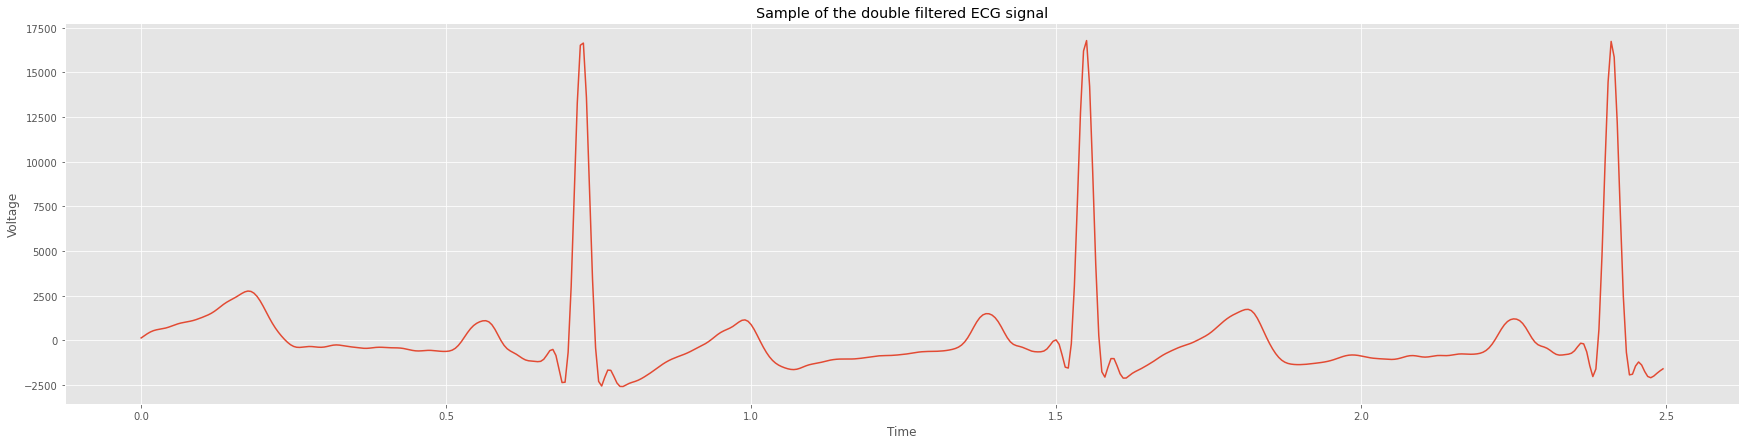

In [31]:
# Applying a Moving average filter to the butterworth-filtered signals

ecg_clean_filtered_ma = signal.filtfilt(b, a, ecg_clean_filtered) 

ppg_m_r1_filtered_ma = signal.lfilter(d, c, ppg_m_r1_filtered)

plt.figure(figsize=(30, 7))
plt.title('Double filtered PPG signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(new_timestamps_ppg_m_r1[0:len(ppg_motion_red_1)], ppg_m_r1_filtered_ma[0:len(ppg_motion_red_1)])
plt.show()

plt.figure(figsize=(30, 7))
plt.title('Sample of the double filtered PPG signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(new_timestamps_ppg_m_r1[0:500], ppg_m_r1_filtered_ma[0:500])
plt.show()

plt.figure(figsize=(30, 7))
plt.title('Double filtered ECG signal')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.plot(new_timestamps_ecg_c[0:len(ecg_clean)], ecg_clean_filtered_ma[0:len(ecg_clean)])
plt.show()

plt.figure(figsize=(30, 7))
plt.title('Sample of the double filtered ECG signal')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.plot(new_timestamps_ecg_c[0:500], ecg_clean_filtered_ma[0:500])
plt.show()

<font color = green> After double-filtering, both signals are extremely clear. The quality has improved and the signals are analyzable. These filters are now applicable for all signals, even though only two were selected to inspect.

In [32]:
arr1 = new_timestamps_ecg_c
arr2 = ecg_clean_filtered_ma

arr3 = new_timestamps_ppg_m_r1
arr4 = ppg_m_r1_filtered_ma

new_df_ecg = pd.DataFrame(np.hstack((arr1[:,None], arr2[:,None])), columns = ['ecg_time', 'ecg_sig'])
new_df_ppg = pd.DataFrame(np.hstack((arr3[:,None], arr4[:,None])), columns = ['ppg_time', 'ppg_sig'])
print(new_df_ecg)
print(new_df_ppg)

new_df_ecg.to_csv('filtered_ecg_data.csv')
new_df_ppg.to_csv('filtered_ppg_data.csv')

       ecg_time     ecg_sig
0         0.000  136.128132
1         0.005  256.981026
2         0.010  370.933553
3         0.015  468.601759
4         0.020  541.858765
...         ...         ...
24487   122.435 -369.598394
24488   122.440 -315.171303
24489   122.445 -271.893970
24490   122.450 -249.411860
24491   122.455 -243.133205

[24492 rows x 2 columns]
       ppg_time        ppg_sig
0         0.000      -0.102489
1         0.005      -0.507563
2         0.010      -1.301734
3         0.015      -2.460474
4         0.020      -3.955136
...         ...            ...
24968   124.840  295846.667716
24969   124.845  303249.090437
24970   124.850  310367.983635
24971   124.855  317141.446095
24972   124.860  323505.203819

[24973 rows x 2 columns]
